In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 11.6 MB/s eta 0:00:00


===== KẾT QUẢ HỆ THỐNG TÀI XẾ GIAO ĐỒ ĂN =====
Estimated Delivery (0..60): 39.84463276836158
Incentive Bonus   (0..100): 66.06703022040448
Driver Rating     (0..5)  : 2.4003078535403155


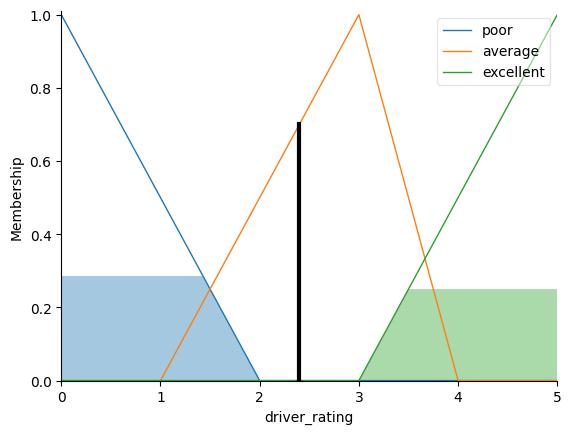

In [9]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

traffic   = ctrl.Antecedent(np.arange(0, 11, 1), 'traffic')
distance  = ctrl.Antecedent(np.arange(0, 11, 1), 'distance')
weather   = ctrl.Antecedent(np.arange(0, 11, 1), 'weather')
prep_time = ctrl.Antecedent(np.arange(0, 16, 1), 'prep_time')
fatigue   = ctrl.Antecedent(np.arange(0, 11, 1), 'fatigue')

traffic['low']    = fuzz.trimf(traffic.universe, [0, 0, 4])
traffic['medium'] = fuzz.trimf(traffic.universe, [3, 5, 7])
traffic['high']   = fuzz.trimf(traffic.universe, [6, 10, 10])

distance['short']  = fuzz.trimf(distance.universe, [0, 0, 4])
distance['medium'] = fuzz.trimf(distance.universe, [3, 5, 7])
distance['long']   = fuzz.trimf(distance.universe, [6, 10, 10])

weather['clear']  = fuzz.trimf(weather.universe, [0, 0, 4])
weather['rainy']  = fuzz.trimf(weather.universe, [3, 5, 7])
weather['stormy'] = fuzz.trimf(weather.universe, [6, 10, 10])

prep_time['fast']   = fuzz.trimf(prep_time.universe, [0, 0, 4])
prep_time['medium'] = fuzz.trimf(prep_time.universe, [3, 6, 9])
prep_time['slow']   = fuzz.trimf(prep_time.universe, [8, 15, 15])

fatigue['low']    = fuzz.trimf(fatigue.universe, [0, 0, 4])
fatigue['medium'] = fuzz.trimf(fatigue.universe, [3, 5, 7])
fatigue['high']   = fuzz.trimf(fatigue.universe, [6, 10, 10])

est_delivery = ctrl.Consequent(np.arange(0, 61, 1), 'est_delivery')
est_delivery['short']  = fuzz.trimf(est_delivery.universe, [0, 0, 20])
est_delivery['medium'] = fuzz.trimf(est_delivery.universe, [15, 30, 35])
est_delivery['long']   = fuzz.trimf(est_delivery.universe, [30, 60, 60])

ed_rule1 = ctrl.Rule(traffic['low'] & distance['short'],   est_delivery['short'])
ed_rule2 = ctrl.Rule(traffic['medium'] & distance['medium'], est_delivery['medium'])
ed_rule3 = ctrl.Rule(traffic['high'] & distance['long'],   est_delivery['long'])

ed_rule4 = ctrl.Rule(prep_time['fast'],                    est_delivery['short'])
ed_rule5 = ctrl.Rule(prep_time['slow'] & traffic['high'], est_delivery['long'])

ed_rule6 = ctrl.Rule(weather['stormy'],                    est_delivery['long'])
ed_rule7 = ctrl.Rule(weather['rainy'] & traffic['low'],    est_delivery['medium'])

ed_rule8 = ctrl.Rule(fatigue['high'] & distance['long'],   est_delivery['long'])
ed_rule9 = ctrl.Rule(fatigue['low']  & distance['short'],  est_delivery['short'])

est_delivery_ctrl = ctrl.ControlSystem([
    ed_rule1, ed_rule2, ed_rule3, ed_rule4, ed_rule5,
    ed_rule6, ed_rule7, ed_rule8, ed_rule9
])
est_delivery_sim = ctrl.ControlSystemSimulation(est_delivery_ctrl)

incentive = ctrl.Consequent(np.arange(0, 101, 1), 'incentive')
incentive['low']    = fuzz.trimf(incentive.universe, [0, 0, 30])
incentive['medium'] = fuzz.trimf(incentive.universe, [20, 50, 70])
incentive['high']   = fuzz.trimf(incentive.universe, [60, 100, 100])

ib_rule1 = ctrl.Rule(weather['clear'],   incentive['low'])
ib_rule2 = ctrl.Rule(weather['rainy'],   incentive['medium'])
ib_rule3 = ctrl.Rule(weather['stormy'],  incentive['high'])

ib_rule4 = ctrl.Rule(distance['long'] | prep_time['slow'], incentive['high'])

ib_rule5 = ctrl.Rule(traffic['high'],    incentive['medium'])

ib_rule6 = ctrl.Rule(fatigue['high'], incentive['high'])

incentive_ctrl = ctrl.ControlSystem([ib_rule1, ib_rule2, ib_rule3, ib_rule4, ib_rule5, ib_rule6])
incentive_sim  = ctrl.ControlSystemSimulation(incentive_ctrl)

driver_rating = ctrl.Consequent(np.arange(0, 6, 1), 'driver_rating')
driver_rating['poor']      = fuzz.trimf(driver_rating.universe, [0, 0, 2])
driver_rating['average']   = fuzz.trimf(driver_rating.universe, [1, 3, 4])
driver_rating['excellent'] = fuzz.trimf(driver_rating.universe, [3, 5, 5])
dr_rule1 = ctrl.Rule(fatigue['low'],    driver_rating['excellent'])
dr_rule2 = ctrl.Rule(fatigue['medium'], driver_rating['average'])
dr_rule3 = ctrl.Rule(fatigue['high'],   driver_rating['poor'])
dr_rule4 = ctrl.Rule(prep_time['slow'], driver_rating['poor'])
dr_rule5 = ctrl.Rule(traffic['low'] & distance['short'] & weather['clear'],
                     driver_rating['excellent'])
dr_rule6 = ctrl.Rule(traffic['high'] & distance['long'] & weather['stormy'],
                     driver_rating['poor'])

driver_rating_ctrl = ctrl.ControlSystem([dr_rule1, dr_rule2, dr_rule3, dr_rule4, dr_rule5, dr_rule6])
driver_rating_sim  = ctrl.ControlSystemSimulation(driver_rating_ctrl)
test_input = {
    'traffic':   8,
    'distance':  2,
    'weather':   9,
    'prep_time': 10,
    'fatigue':   3
}

est_delivery_sim.input['traffic']   = test_input['traffic']
est_delivery_sim.input['distance']  = test_input['distance']
est_delivery_sim.input['weather']   = test_input['weather']
est_delivery_sim.input['prep_time'] = test_input['prep_time']
est_delivery_sim.input['fatigue']   = test_input['fatigue']
est_delivery_sim.compute()

incentive_sim.input['traffic']   = test_input['traffic']
incentive_sim.input['distance']  = test_input['distance']
incentive_sim.input['weather']   = test_input['weather']
incentive_sim.input['prep_time'] = test_input['prep_time']
incentive_sim.input['fatigue']   = test_input['fatigue']
incentive_sim.compute()

driver_rating_sim.input['traffic']   = test_input['traffic']
driver_rating_sim.input['distance']  = test_input['distance']
driver_rating_sim.input['weather']   = test_input['weather']
driver_rating_sim.input['prep_time'] = test_input['prep_time']
driver_rating_sim.input['fatigue']   = test_input['fatigue']
driver_rating_sim.compute()

print("===== KẾT QUẢ HỆ THỐNG TÀI XẾ GIAO ĐỒ ĂN =====")
print("Estimated Delivery (0..60):", est_delivery_sim.output['est_delivery'])
print("Incentive Bonus   (0..100):", incentive_sim.output['incentive'])
print("Driver Rating     (0..5)  :", driver_rating_sim.output['driver_rating'])

driver_rating.view(sim=driver_rating_sim)